## Model OFLinearRegression

In [1]:
import sys
sys.path.append('../pyorderedfuzzy')
sys.path.append('../pyimgamo')

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ofnumber as ofn
import ofmodels as ofm
import ofrandom as ofr
import imgamo
from problems import OFAR
from players import ClonalSelection
from operators import hiper_mutate

### Dane Isibuchi plus losowe błędy

In [3]:
x = np.array([2, 4, 6, 8, 10, 12, 14, 16])
y = np.array([14, 16, 14, 18, 18, 22, 18, 22])
er_y = np.array([0.12417, 0.45587, 1.16176, 0.70287, 0.05801, 1.90618, 1.26043, 0.14221])
er_x = np.array([0.47001, 0.11422, 0.67202, 0.16389, 0.44385, 0.13626, 0.79932, 0.35240])

### Rozmycie zapomoca funkcji stałych równych sobie (brak rozmycia)

In [4]:
dim = 11
X = np.array([ofn.OFNumber.init_from_scalar(e, dim=dim) for e in x], dtype=object).reshape((len(x),1))
Y = np.array([ofn.OFNumber.init_from_scalar(e, dim=dim) for e in y], dtype=object)
X.shape, Y.shape

((8, 1), (8,))

<IPython.core.display.Javascript object>


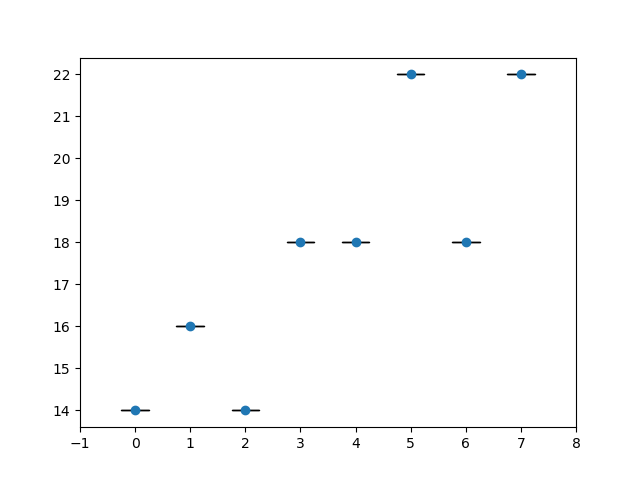

In [5]:
fig, ax = plt.subplots()
ax.plot(y, 'o')
ofm.OFSeries(Y).plot_ofseries(ax)
plt.show()

In [6]:
model = ofm.OFLinearRegression()

In [7]:
model.fit(X, Y)

<IPython.core.display.Javascript object>


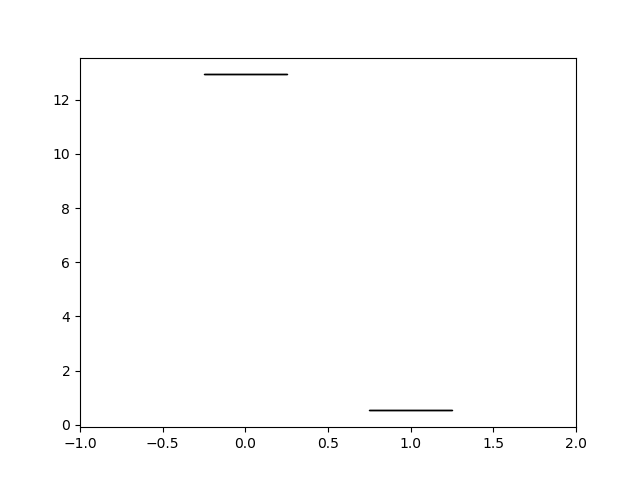

In [8]:
fig, ax = plt.subplots()
model.coefs.plot_ofseries(ax)
plt.show()

<IPython.core.display.Javascript object>


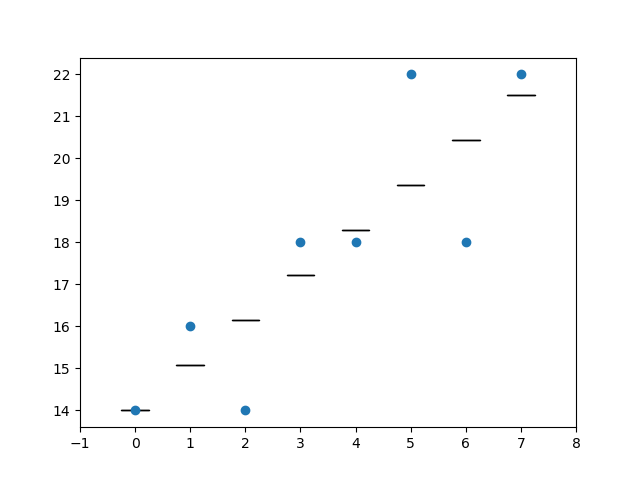

In [9]:
Y_pred = model.predict(X)
fig, ax = plt.subplots()
Y_pred.plot_ofseries(ax)
ax.plot(y, 'o')
plt.show()

### IMGAMO

In [15]:
nvars = 2*dim
nobjs = 2
bounds = ((-5.0, 5.0),) * nvars
intercept = True
n_coef = X.shape[1] + 1 if intercept else X.shape[1]
data_x = np.ones((len(Y), n_coef, 2*dim))
for i in range(len(Y)):
    if intercept:
        data_x[i, 1:, :] = np.stack(ofm.OFSeries(X[i]).to_array(stack='hstack'))
    else:
        data_x[i] = np.stack(ofm.OFSeries(X[i]).to_array(stack='hstack'))
data_y = np.stack(ofm.OFSeries(Y).to_array(stack='hstack'))
problem = OFAR(nvars, nobjs, bounds, data_x, data_y)
print(data_y.shape)
print(data_x.shape)

(8, 22)
(8, 2, 22)


In [21]:
c = np.hstack(model.coefs.to_array(stack='hstack'))
print(c)
problem.evaluate_all(c.reshape((1,-1)))

[12.92857143 12.92857143 12.92857143 12.92857143 12.92857143 12.92857143
 12.92857143 12.92857143 12.92857143 12.92857143 12.92857143 12.92857143
 12.92857143 12.92857143 12.92857143 12.92857143 12.92857143 12.92857143
 12.92857143 12.92857143 12.92857143 12.92857143  0.53571429  0.53571429
  0.53571429  0.53571429  0.53571429  0.53571429  0.53571429  0.53571429
  0.53571429  0.53571429  0.53571429  0.53571429  0.53571429  0.53571429
  0.53571429  0.53571429  0.53571429  0.53571429  0.53571429  0.53571429
  0.53571429  0.53571429]


array([[-0.,  0.]])

In [30]:
y1 = Y_pred[0].to_array(stack='hstack')

In [31]:
x1 = Y[0].to_array(stack='hstack')

In [32]:
x_ = x1.reshape((2, -1))
y_ = y1.reshape((2, -1))
# order
zx = x_[0] <= x_[1]
zy = y_[0] <= y_[1]
        
#if not np.all(zx == zy):
#            return 0
#        # coverage
#        f1 = np.min([y_[0], y_[1]], axis=0) <= x_[0]
#        f2 = x_[0] <= np.max([y_[0], y_[1]], axis=0)
#        g1 = np.min([y_[0], y_[1]], axis=0) <= x_[1]
#        g2 = x_[1] <= np.max([y_[0], y_[1]], axis=0)
#        r = np.all([np.all([f1, f2], axis=0), np.all([g1, g2], axis=0)], axis=0).astype(int)

In [33]:
zx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [34]:
zy

array([ True, False,  True,  True, False, False,  True, False,  True,
       False, False])

In [35]:
np.all(zx == zy)

False

In [27]:
problem.include(Y[0].to_array(stack='hstack'), Y_pred[0].to_array(stack='hstack'))

0

### Rozmycie y za pomocą symetrycznych trójkątnych ofn

In [12]:
dim = 11
X = np.array([ofn.OFNumber.init_from_scalar(e, dim=dim) for e in x], dtype=object).reshape((len(x),1))
Y = np.array([ofn.OFNumber.init_trapezoid_x0x1(e-er, e, e+er, e, dim=dim) for e, er in zip(y,er_y)], dtype=object)
X.shape, Y.shape

((8, 1), (8,))

<IPython.core.display.Javascript object>


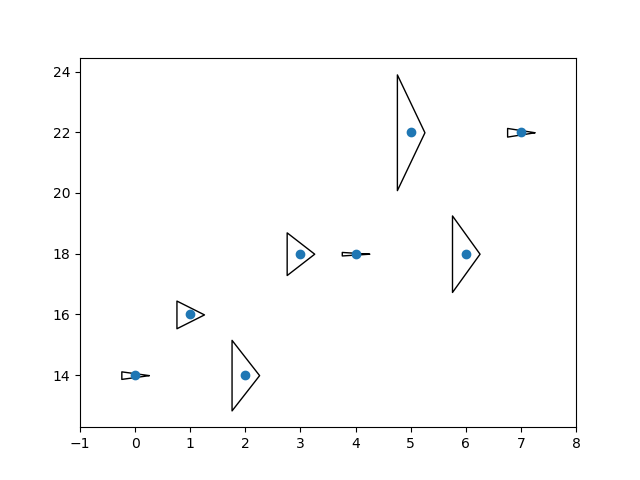

In [13]:
fig, ax = plt.subplots()
ax.plot(y, 'o')
ofm.OFSeries(Y).plot_ofseries(ax)
plt.show()

In [14]:
model.fit(X, Y)

<IPython.core.display.Javascript object>


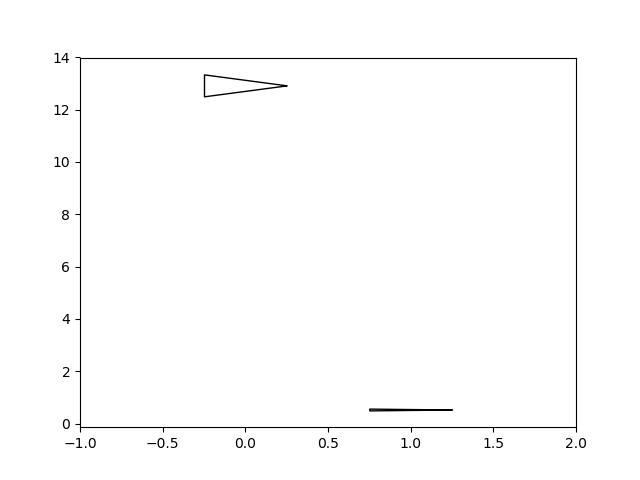

In [15]:
fig, ax = plt.subplots()
model.coefs.plot_ofseries(ax)
plt.show()

<IPython.core.display.Javascript object>


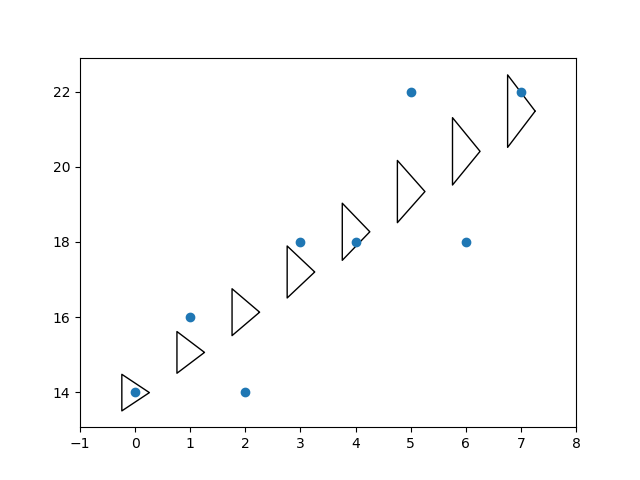

In [16]:
Y_pred = model.predict(X)
fig, ax = plt.subplots()
Y_pred.plot_ofseries(ax)
ax.plot(y, 'o')
plt.show()

### Dodanie skierowania do Y

In [17]:
dim = 11
X = np.array([ofn.OFNumber.init_from_scalar(e, dim=dim) for e in x], dtype=object).reshape((len(x),1))
Y = np.array([ofn.OFNumber.init_trapezoid_x0x1(e-er, e, e+er, e, dim=dim) for e, er in zip(y,er_y)], dtype=object)
Y[1:] = np.array([Y[i].change_order() if y[i] < y[i-1] else Y[i] for i in range(1,len(y))])
X.shape, Y.shape

((8, 1), (8,))

<IPython.core.display.Javascript object>


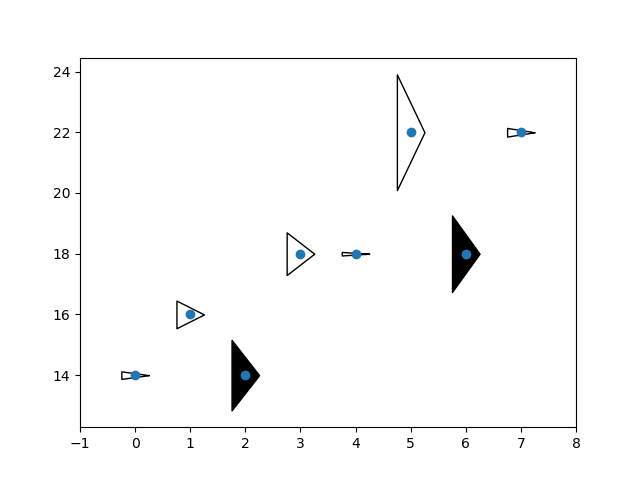

In [18]:
fig, ax = plt.subplots()
ax.plot(y, 'o')
ofm.OFSeries(Y).plot_ofseries(ax)
plt.show()

In [19]:
model.fit(X, Y)

<IPython.core.display.Javascript object>


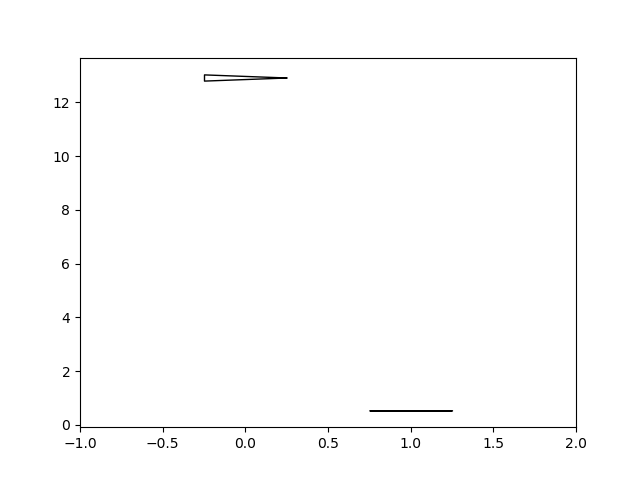

In [20]:
fig, ax = plt.subplots()
model.coefs.plot_ofseries(ax)
plt.show()

<IPython.core.display.Javascript object>


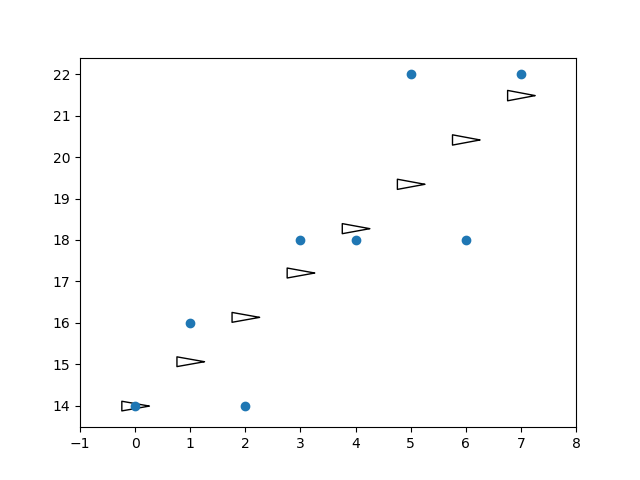

In [21]:
Y_pred = model.predict(X)
fig, ax = plt.subplots()
Y_pred.plot_ofseries(ax)
ax.plot(y, 'o')
plt.show()

### Dodanie rozmycia do x za pomocą gaussowskich ofn

In [22]:
dim = 11
X = np.array([ofn.OFNumber.init_gaussian(e, er, e, -er, dim=dim) for e, er in zip(x,er_x)], dtype=object).reshape((len(x),1))
Y = np.array([ofn.OFNumber.init_trapezoid_x0x1(e-er, e, e+er, e, dim=dim) for e, er in zip(y,er_y)], dtype=object)
Y[1:] = np.array([Y[i].change_order() if y[i] < y[i-1] else Y[i] for i in range(1,len(y))])
X.shape, Y.shape

((8, 1), (8,))

<IPython.core.display.Javascript object>


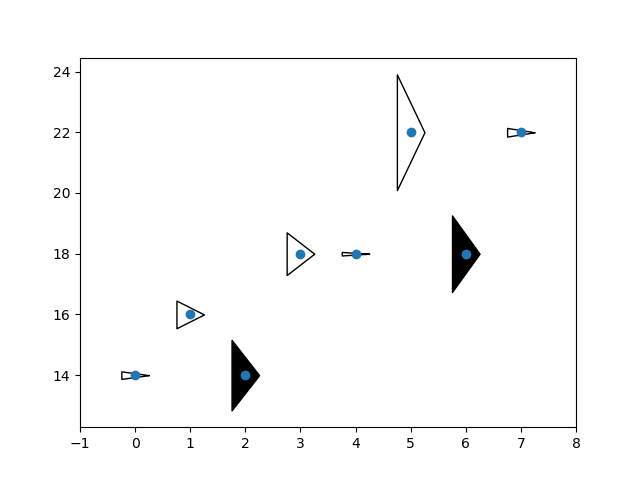

In [23]:
fig, ax = plt.subplots()
ax.plot(y, 'o')
ofm.OFSeries(Y).plot_ofseries(ax)
plt.show()

<IPython.core.display.Javascript object>


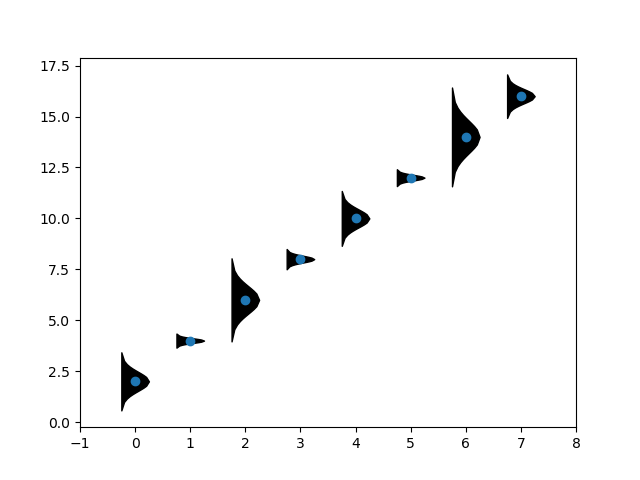

In [24]:
fig, ax = plt.subplots()
ax.plot(x, 'o')
ofm.OFSeries(X[:,0]).plot_ofseries(ax)
plt.show()

In [25]:
model.fit(X, Y)

<IPython.core.display.Javascript object>


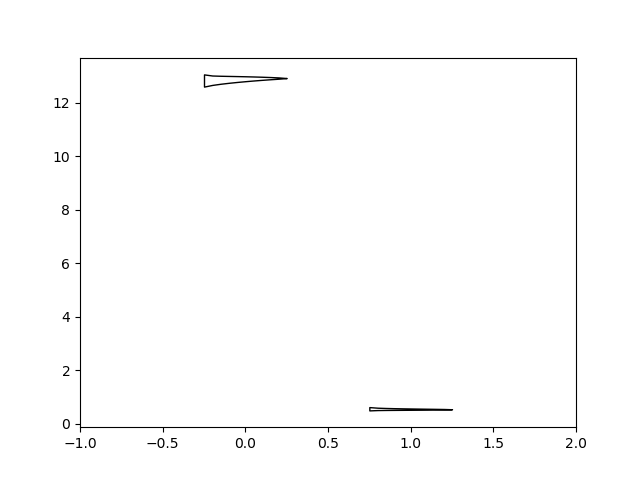

In [26]:
fig, ax = plt.subplots()
model.coefs.plot_ofseries(ax)
plt.show()

<IPython.core.display.Javascript object>


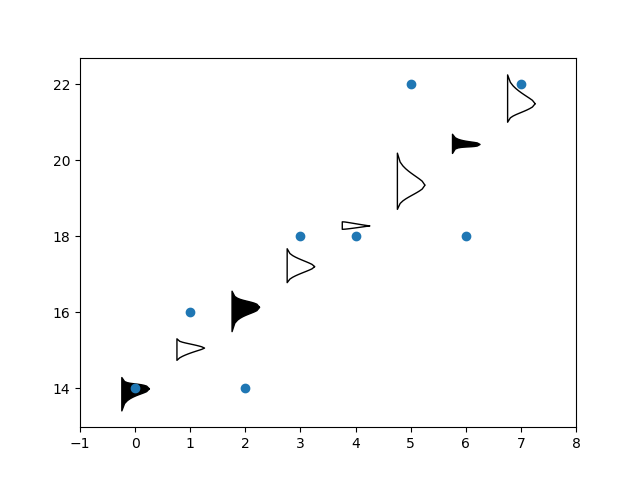

In [27]:
Y_pred = model.predict(X)
fig, ax = plt.subplots()
Y_pred.plot_ofseries(ax)
ax.plot(y, 'o')
plt.show()